In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# データの読み込み
boston = load_boston()

# 訓練データ、テストデータに分割
X, Xtest, y, ytest = train_test_split(boston['data'], boston['target'], test_size=0.2, random_state=114514)
# 6:2:2に分割にするため、訓練データのうちの後ろ1/4を交差検証データとする
# 交差検証データのジェネレーター
def gen_cv():
    m_train = np.floor(len(y)*0.75).astype(int)#このキャストをintにしないと後にハマる
    train_indices = np.arange(m_train)
    test_indices = np.arange(m_train, len(y))
    yield (train_indices, test_indices)
# (それぞれ303 101 102 = サンプル合計は506)
print("リッジ回帰")
print()
print("訓練データ、交差検証データ、テストデータの数 = ", end="")
print(len(next(gen_cv())[0]), len(next(gen_cv())[1]), len(ytest) )
print()

リッジ回帰

訓練データ、交差検証データ、テストデータの数 = 303 101 102



In [2]:
# 訓練データを基準に標準化（平均、標準偏差で標準化）
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
# テストデータも標準化
Xtest_norm = scaler.transform(Xtest)

In [3]:
# ハイパーパラメータのチューニング
params = {"alpha":np.logspace(-2, 4, 24)}
gridsearch = GridSearchCV(Ridge(), params, cv=gen_cv(), scoring="r2", return_train_score=True)
gridsearch.fit(X_norm, y)
print("αのチューニング")
print("最適なパラメーター =", gridsearch.best_params_, "精度 =", gridsearch.best_score_)
print()

αのチューニング
最適なパラメーター = {'alpha': 149.2495545051829} 精度 = 0.690669026120447



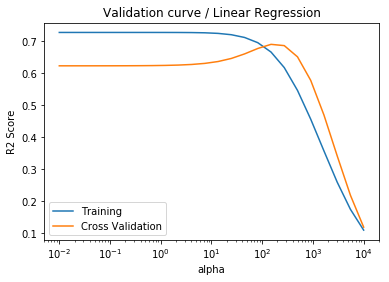

In [4]:
# 検証曲線
plt.semilogx(params["alpha"], gridsearch.cv_results_["mean_train_score"], label="Training")
plt.semilogx(params["alpha"], gridsearch.cv_results_["mean_test_score"], label="Cross Validation")
plt.xlabel("alpha")
plt.ylabel("R2 Score")
plt.title("Validation curve / Linear Regression")
plt.legend()
plt.show()

In [5]:
# チューニングしたαでフィット
regr = Ridge(alpha=gridsearch.best_params_["alpha"])
train_indices = next(gen_cv())[0]
valid_indices = next(gen_cv())[1]
regr.fit(X_norm[train_indices, :], y[train_indices])
print("切片と係数")
print(regr.intercept_)
print(regr.coef_)
print()
# テストデータの精度を計算
print("テストデータにフィット")
print("テストデータの精度 =", regr.score(Xtest_norm, ytest))
print()
print("※参考")
print("訓練データの精度 =", regr.score(X_norm[train_indices, :], y[train_indices]))
print("交差検証データの精度 =", regr.score(X_norm[valid_indices, :], y[valid_indices]))

切片と係数
22.893123943264357
[-0.46861415  0.51249514 -0.34423964  0.94872619 -0.55980061  2.44810234
 -0.08502659 -1.08996542  0.48912441 -0.35540356 -1.38785068  0.60844346
 -2.86197237]

テストデータにフィット
テストデータの精度 = 0.7713515272238125

※参考
訓練データの精度 = 0.6666027990264252
交差検証データの精度 = 0.690669026120447
